In [5]:
import os
import numpy as np
import random
import math
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

In [6]:
plt.style.use("bmh")

# -- set grayscale to be the default color map 
# plt.rcParams["image.cmap"] = "gist_gray"
plt.rcParams["axes.grid"] = False
plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams['axes.titlepad'] = 0 

In [7]:
def bin_imgs(imgs, fac, noise=None):
    """
    Bin sequence of images (nrow,ncol,ntsteps) and add noise if desired.
    If adding noise, set noise kw to be a tuple of (seed, mean, sigma[unbinned])
    """
    
    # -- bin our image by 80 and get the time series image for a given night
    sh = imgs.shape
    img_bin = imgs.reshape(sh[0]//fac, fac, sh[1]//fac, fac, sh[2]).mean(axis=(1, 3))

    # -- add gaussian noise
    seed_noise, mean, sigma = noise
    new_amp = sigma / math.sqrt(fac * fac)
    np.random.seed(seed_noise)

    # -- add noise to binned image
    img_bin_noise = img_bin.copy()
    for i in range(3240):
        img_bin_noise[:, :, i] = img_bin[:, :, i] + \
            np.random.normal(mean, new_amp, (img_bin.shape[0], img_bin.shape[1]))
        
    return img_bin_noise

In [8]:
# -- set the seeds for the locations and time series (up to 6 digits)
seed_loc = 314
seed_ts0 = 128
seed_ts1 = 964

# -- load locations
loc_fname = "../../lighting-tech-changeover/output/img_simu_loc_{0:06}.npy".format(seed_loc)
loc = np.load(loc_fname)

# -- get the corresponding time series
ts_fname0 = "../../lighting-tech-changeover/output/img_simu_src_curve_{0:06}.npy".format(seed_ts0)
srcs0 = np.load(ts_fname0)
ts_fname1 = "../../lighting-tech-changeover/output/img_simu_src_curve_{0:06}.npy".format(seed_ts1)
srcs1 = np.load(ts_fname1)

In [13]:
3240/9/60

6.0

In [42]:
# -- duplicate each light curve by nine times
src0 = np.repeat(srcs0, repeats=9, axis=0)

# -- get full list of source location
loc_new = []
for i in range(len(loc)):
    loc0 = (loc[i][0] + 1, loc[i][1])
    loc1 = (loc[i][0] - 1, loc[i][1])
    loc2 = (loc[i][0], loc[i][1])
    loc3 = (loc[i][0], loc[i][1] + 1)
    loc4 = (loc[i][0], loc[i][1] - 1)
    loc5 = (loc[i][0] - 1, loc[i][1] - 1)
    loc6 = (loc[i][0] - 1, loc[i][1] + 1)
    loc7 = (loc[i][0] + 1, loc[i][1] - 1)
    loc8 = (loc[i][0] + 1, loc[i][1] + 1)
    
    
    loc_new.append(loc0)
    loc_new.append(loc1)
    loc_new.append(loc2)
    loc_new.append(loc3)
    loc_new.append(loc4)
    loc_new.append(loc5)
    loc_new.append(loc6)
    loc_new.append(loc7)
    loc_new.append(loc8)

# -- add sources curve to time series images (try/except to handle boundaries)
t0 = time.time()
imgs = np.zeros((2560, 1920, 3240))
print(time.time() - t0)
for i in range(len(loc_new)):
    try:
        imgs[loc_new[i][0], loc_new[i][1], :] = src0[i]
    except:
        continue
        
# -- bin images and add noise
imgs_bin_noise0 = bin_imgs(imgs, 80, noise=(333, 0., 0.01))

0.4729611873626709


In [47]:
# -- duplicate each light curve by five times
src1 = np.repeat(srcs1, repeats=9, axis=0)

# -- get full list of source location
loc_new = []
for i in range(len(loc)):
    loc0 = (loc[i][0] + 1, loc[i][1])
    loc1 = (loc[i][0] - 1, loc[i][1])
    loc2 = (loc[i][0], loc[i][1])
    loc3 = (loc[i][0], loc[i][1] + 1)
    loc4 = (loc[i][0], loc[i][1] - 1)
    loc5 = (loc[i][0] - 1, loc[i][1] - 1)
    loc6 = (loc[i][0] - 1, loc[i][1] + 1)
    loc7 = (loc[i][0] + 1, loc[i][1] - 1)
    loc8 = (loc[i][0] + 1, loc[i][1] + 1)
    
    
    loc_new.append(loc0)
    loc_new.append(loc1)
    loc_new.append(loc2)
    loc_new.append(loc3)
    loc_new.append(loc4)
    loc_new.append(loc5)
    loc_new.append(loc6)
    loc_new.append(loc7)
    loc_new.append(loc8)

# -- add sources curve to time series images (try/except to handle boundaries)
t0 = time.time()
imgs = np.zeros((2560, 1920, 3240))
print(time.time() - t0)
for i in range(len(loc_new)):
    try:
        imgs[loc_new[i][0], loc_new[i][1], :] = src1[i]
    except:
        continue
        
# -- bin images and add noise
imgs_bin_noise1 = bin_imgs(imgs, 80, noise=(8457, 0., 0.01))

0.4723806381225586


In [ ]:
3240

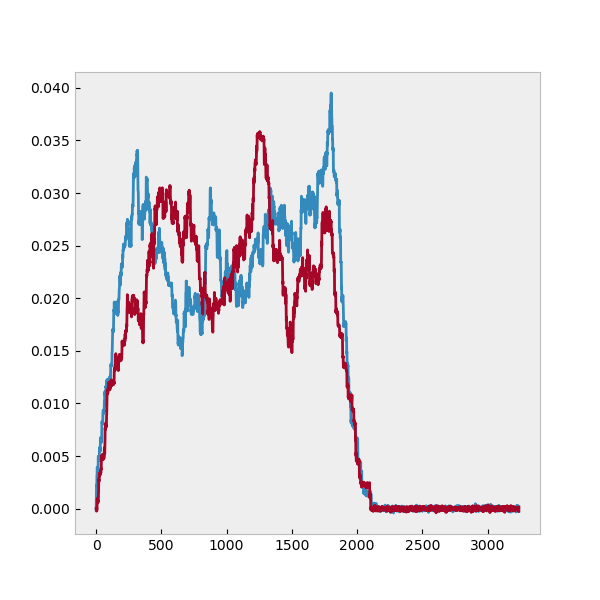

In [48]:
plt.close("all")
plt.plot(imgs_bin_noise0[20, 15, :])
plt.plot(imgs_bin_noise1[20, 15, :])

In [18]:
plt.close("all")
plt.imshow(imgs[:, :, 10])

NameError: name 'imgs' is not defined

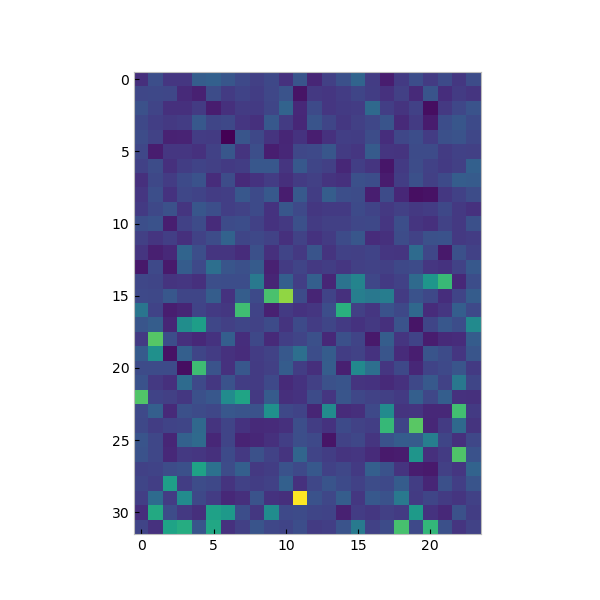

In [29]:
plt.close("all")
plt.imshow(img_bin_noise[:, :, 8] - img_bin_noise[:, :, 7])

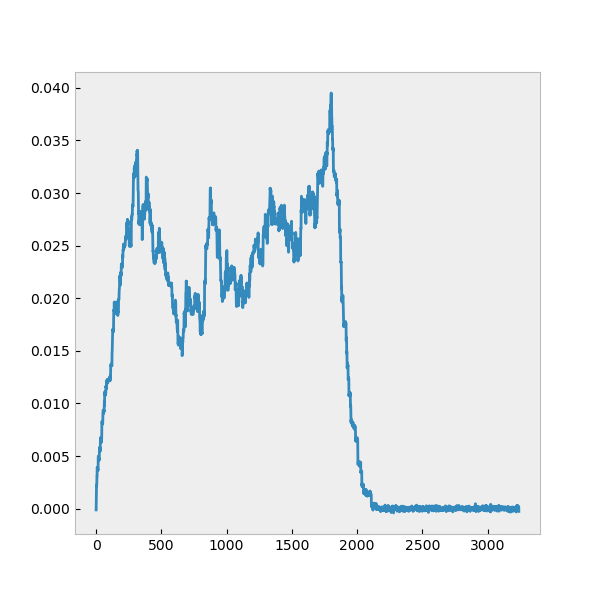

In [31]:
plt.close("all")
plt.plot(img_bin_noise[20, 15])

In [6]:
seed_loc = 315
# -- get the locations
loc_fname = "../../lighting-tech-changeover/output/simulation_month/img_simu_loc_{0:06}.npy".format(seed_loc)

loc = np.load(loc_fname)

seed_ts = 964
ts_fname = "../../lighting-tech-changeover/output/simulation_month/img_simu_src_curve_{0:06}.npy".format(seed_ts)
srcs = np.load(ts_fname)

In [7]:
# -- duplicate each light curve by nine times
src0 = np.repeat(srcs, repeats=9, axis=0)

# -- get full list of source location
loc_new = []
for i in range(len(loc)):
    loc0 = (loc[i][0] + 1, loc[i][1])
    loc1 = (loc[i][0] - 1, loc[i][1])
    loc2 = (loc[i][0], loc[i][1])
    loc3 = (loc[i][0], loc[i][1] + 1)
    loc4 = (loc[i][0], loc[i][1] - 1)
    loc5 = (loc[i][0] - 1, loc[i][1] - 1)
    loc6 = (loc[i][0] - 1, loc[i][1] + 1)
    loc7 = (loc[i][0] + 1, loc[i][1] - 1)
    loc8 = (loc[i][0] + 1, loc[i][1] + 1)
    
    
    loc_new.append(loc0)
    loc_new.append(loc1)
    loc_new.append(loc2)
    loc_new.append(loc3)
    loc_new.append(loc4)
    loc_new.append(loc5)
    loc_new.append(loc6)
    loc_new.append(loc7)
    loc_new.append(loc8)

# -- add sources curve to time series images (try/except to handle boundaries)
t0 = time.time()
imgs = np.zeros((2560, 1920, 3240))
print(time.time() - t0)
for i in range(len(loc_new)):
    try:
        imgs[loc_new[i][0], loc_new[i][1], :] = src0[i]
    except:
        continue

# -- let's turn off one building
# -- get the source locations
# -- load buildingID image
bimg = np.load("../../Downloads/bbls_test.npy").astype(int)
ind = np.where(bimg == 1008337502)
buid_loc = np.array([ind[0],ind[1]]).T
buid_loc[:, 0]
        
# -- select the builing and turn off this building from 10 to 11 pm
for i in range(len(buid_loc)):
    imgs[buid_loc[i][0], buid_loc[i][1], 360:720] = 0
        
# -- bin images and add noise
imgs_bin_noise = bin_imgs(imgs, 80, noise=(333, 0., 0.01))

7.271766662597656e-05


In [8]:
np.save("../../lighting-tech-changeover/output/simulation_month/img_simu_outage{0:06}.npy".format(seed_ts), imgs_bin_noise)

In [9]:
# -- append spec 
import glob
flist = sorted(glob.glob("../../lighting-tech-changeover/output/simulation_month/img_simu_src_curve_*.npy"))

In [8]:
seed_ts = 963

for i in range(len(flist)):
    
    srcs = np.load(flist[i])
    seed_ts = seed_ts +1
    
    
    # -- duplicate each light curve by nine times
    src0 = np.repeat(srcs, repeats=9, axis=0)

    # -- get full list of source location
    loc_new = []
    for i in range(len(loc)):
        loc0 = (loc[i][0] + 1, loc[i][1])
        loc1 = (loc[i][0] - 1, loc[i][1])
        loc2 = (loc[i][0], loc[i][1])
        loc3 = (loc[i][0], loc[i][1] + 1)
        loc4 = (loc[i][0], loc[i][1] - 1)
        loc5 = (loc[i][0] - 1, loc[i][1] - 1)
        loc6 = (loc[i][0] - 1, loc[i][1] + 1)
        loc7 = (loc[i][0] + 1, loc[i][1] - 1)
        loc8 = (loc[i][0] + 1, loc[i][1] + 1)
    
    
        loc_new.append(loc0)
        loc_new.append(loc1)
        loc_new.append(loc2)
        loc_new.append(loc3)
        loc_new.append(loc4)
        loc_new.append(loc5)
        loc_new.append(loc6)
        loc_new.append(loc7)
        loc_new.append(loc8)

    # -- add sources curve to time series images (try/except to handle boundaries)
    t0 = time.time()
    imgs = np.zeros((2560, 1920, 3240))
    print(time.time() - t0)
    for i in range(len(loc_new)):
        try:
            imgs[loc_new[i][0], loc_new[i][1], :] = src0[i]
        except:
            continue

        
    # -- bin images and add noise
    imgs_bin_noise = bin_imgs(imgs, 80, noise=(333, 0., 0.01))
    
    np.save("../../lighting-tech-changeover/output/simulation_month/img_simu_{0:06}.npy".format(seed_ts), imgs_bin_noise)

0.47942662239074707
0.4761373996734619
0.47771549224853516
0.48009824752807617
0.474806547164917
0.4794130325317383
0.4816267490386963
0.4749760627746582
0.47744011878967285
0.4774618148803711
0.477769136428833
0.4793233871459961
0.4787449836730957
0.4797394275665283
0.47724103927612305
0.4809279441833496
0.4784257411956787
0.4792640209197998
0.4767029285430908
0.47783803939819336
0.4755706787109375
0.47936248779296875
0.48023486137390137
0.4818410873413086
0.4785592555999756
0.47557878494262695
0.4752349853515625
0.482330322265625
0.4859049320220947
0.4772348403930664
0.4792656898498535


In [3]:
32*24

768

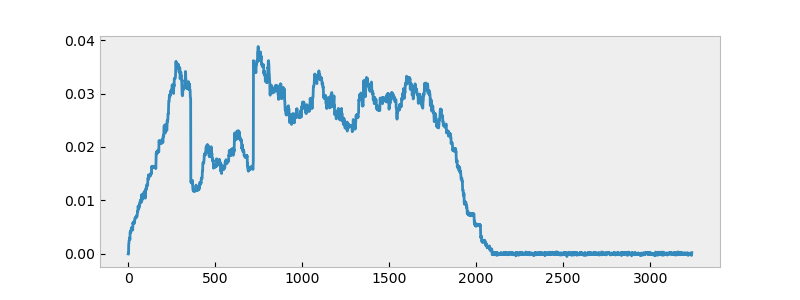

In [10]:
plt.figure(figsize=(8, 3))
plt.plot(imgs_bin_noise[17, 10, :])

In [8]:
import glob
flist_plot = sorted(glob.glob("../../lighting-tech-changeover/output/simulation_month/img_simu_*.npy"))
imgs_bin_noise = np.load("../../lighting-tech-changeover/output/simulation_month/img_simu_outage000964.npy")

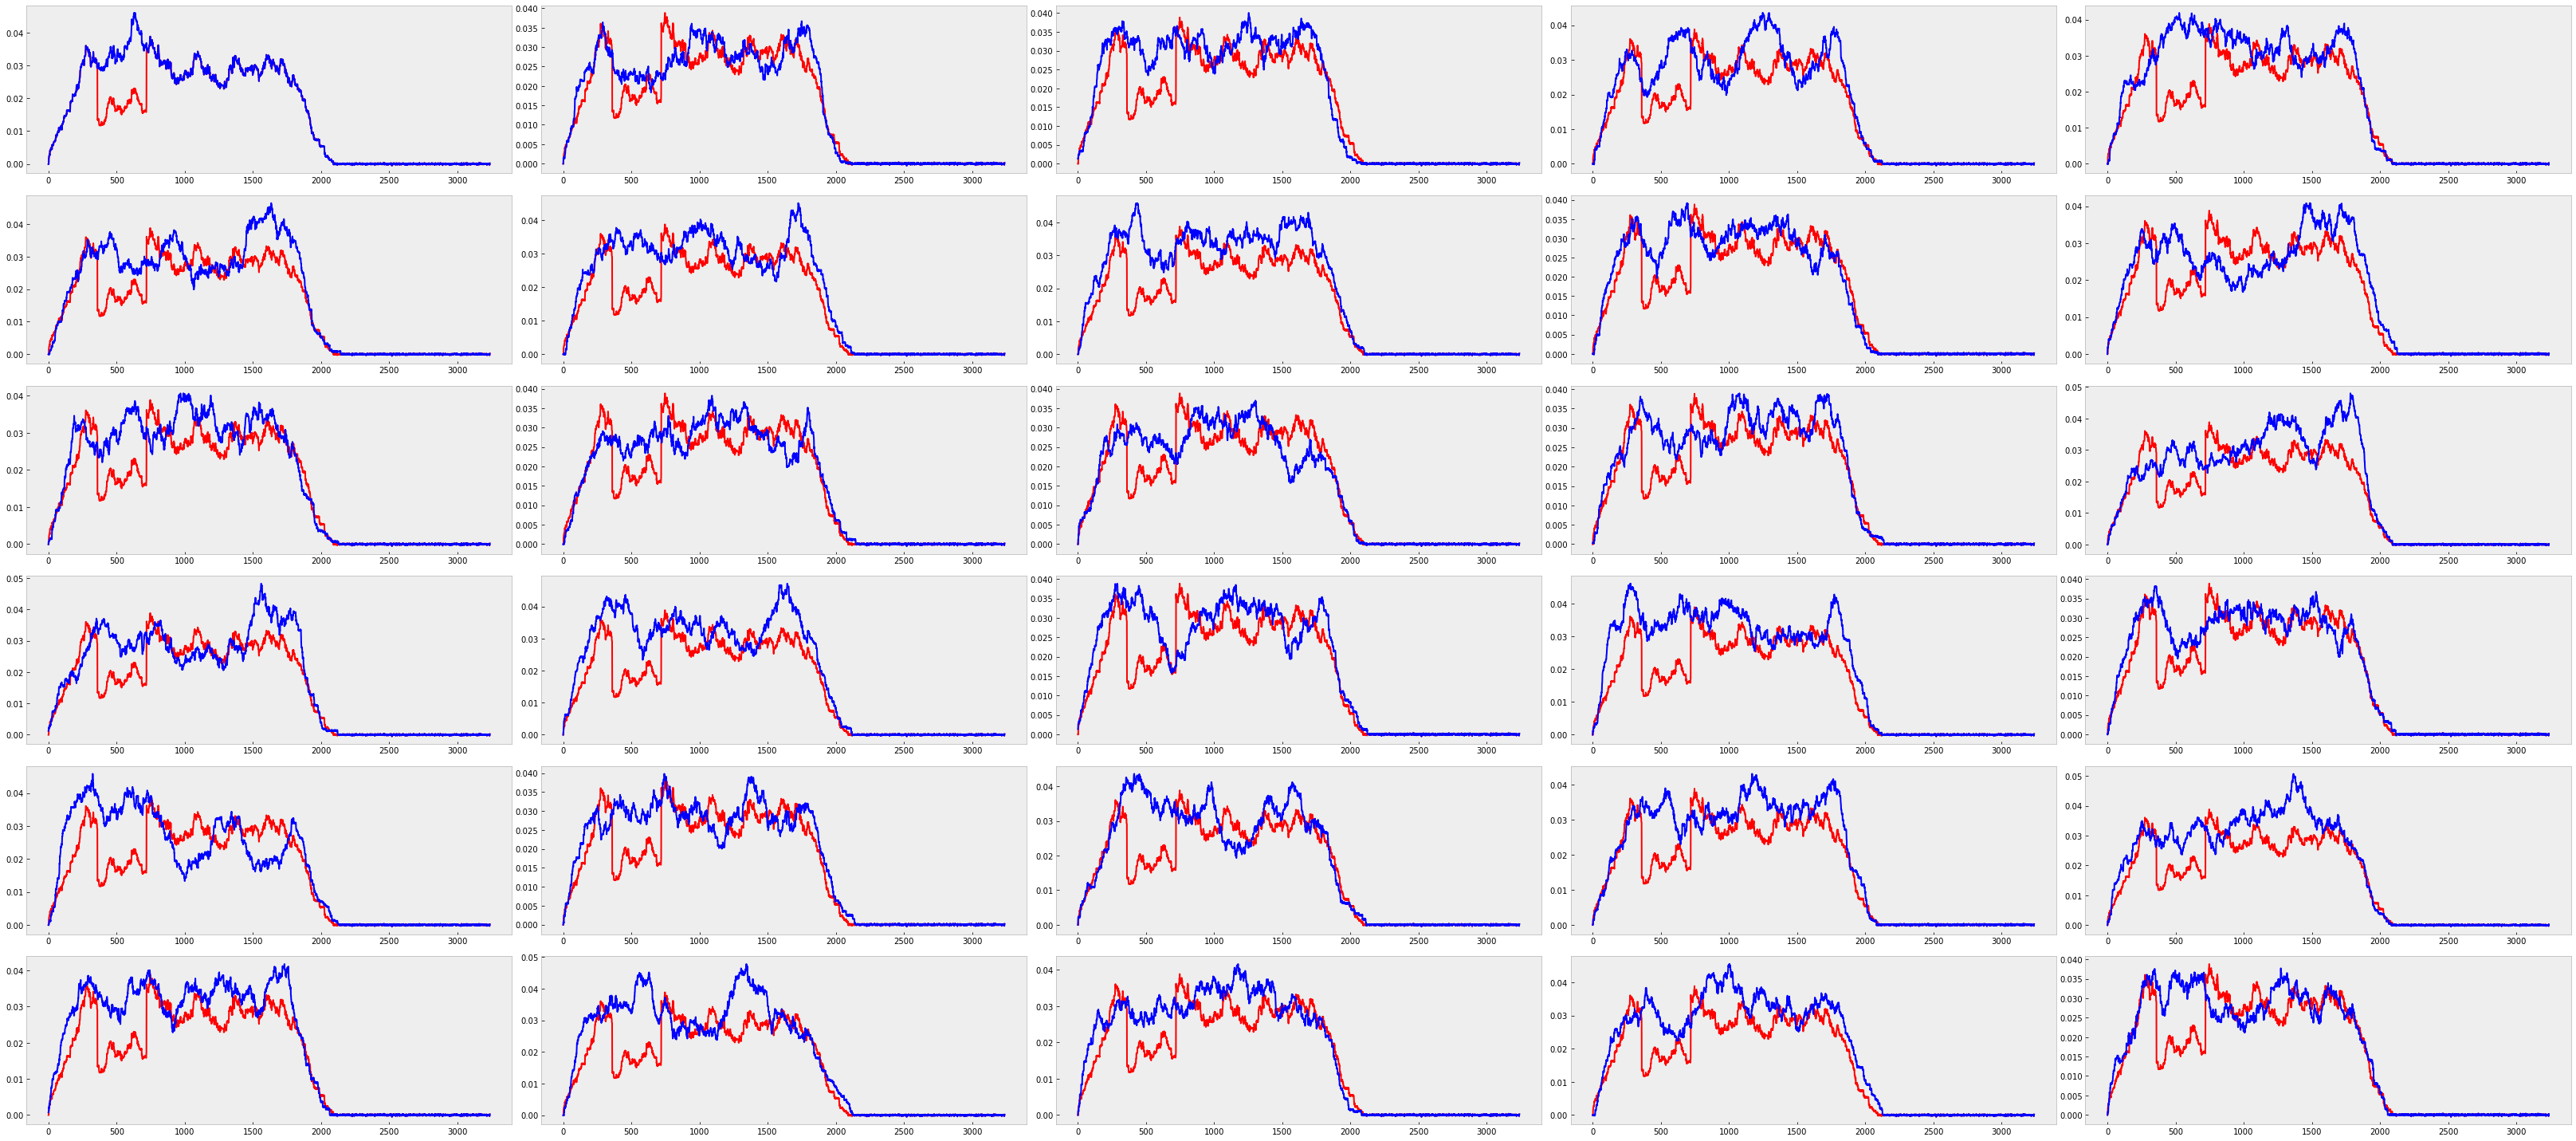

In [32]:
fig, ax = plt.subplots(nrows=6, ncols=5, figsize = (45,20))
num = 0
for i in range(0, 6):
  for j in range(0, 5):
    imgs_bin_noise_plot = np.load(flist_plot[num])
    ax[i, j].plot(imgs_bin_noise[17, 10, :], c = "red")
    ax[i, j].plot(imgs_bin_noise_plot[17, 10, :], c = "blue")
    num = num + 1
    if num == 30:
      break

fig.tight_layout()

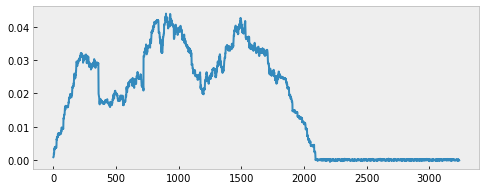

In [23]:
plt.figure(figsize=(8, 3))
plt.plot(imgs_bin_noise[17, 11, :])

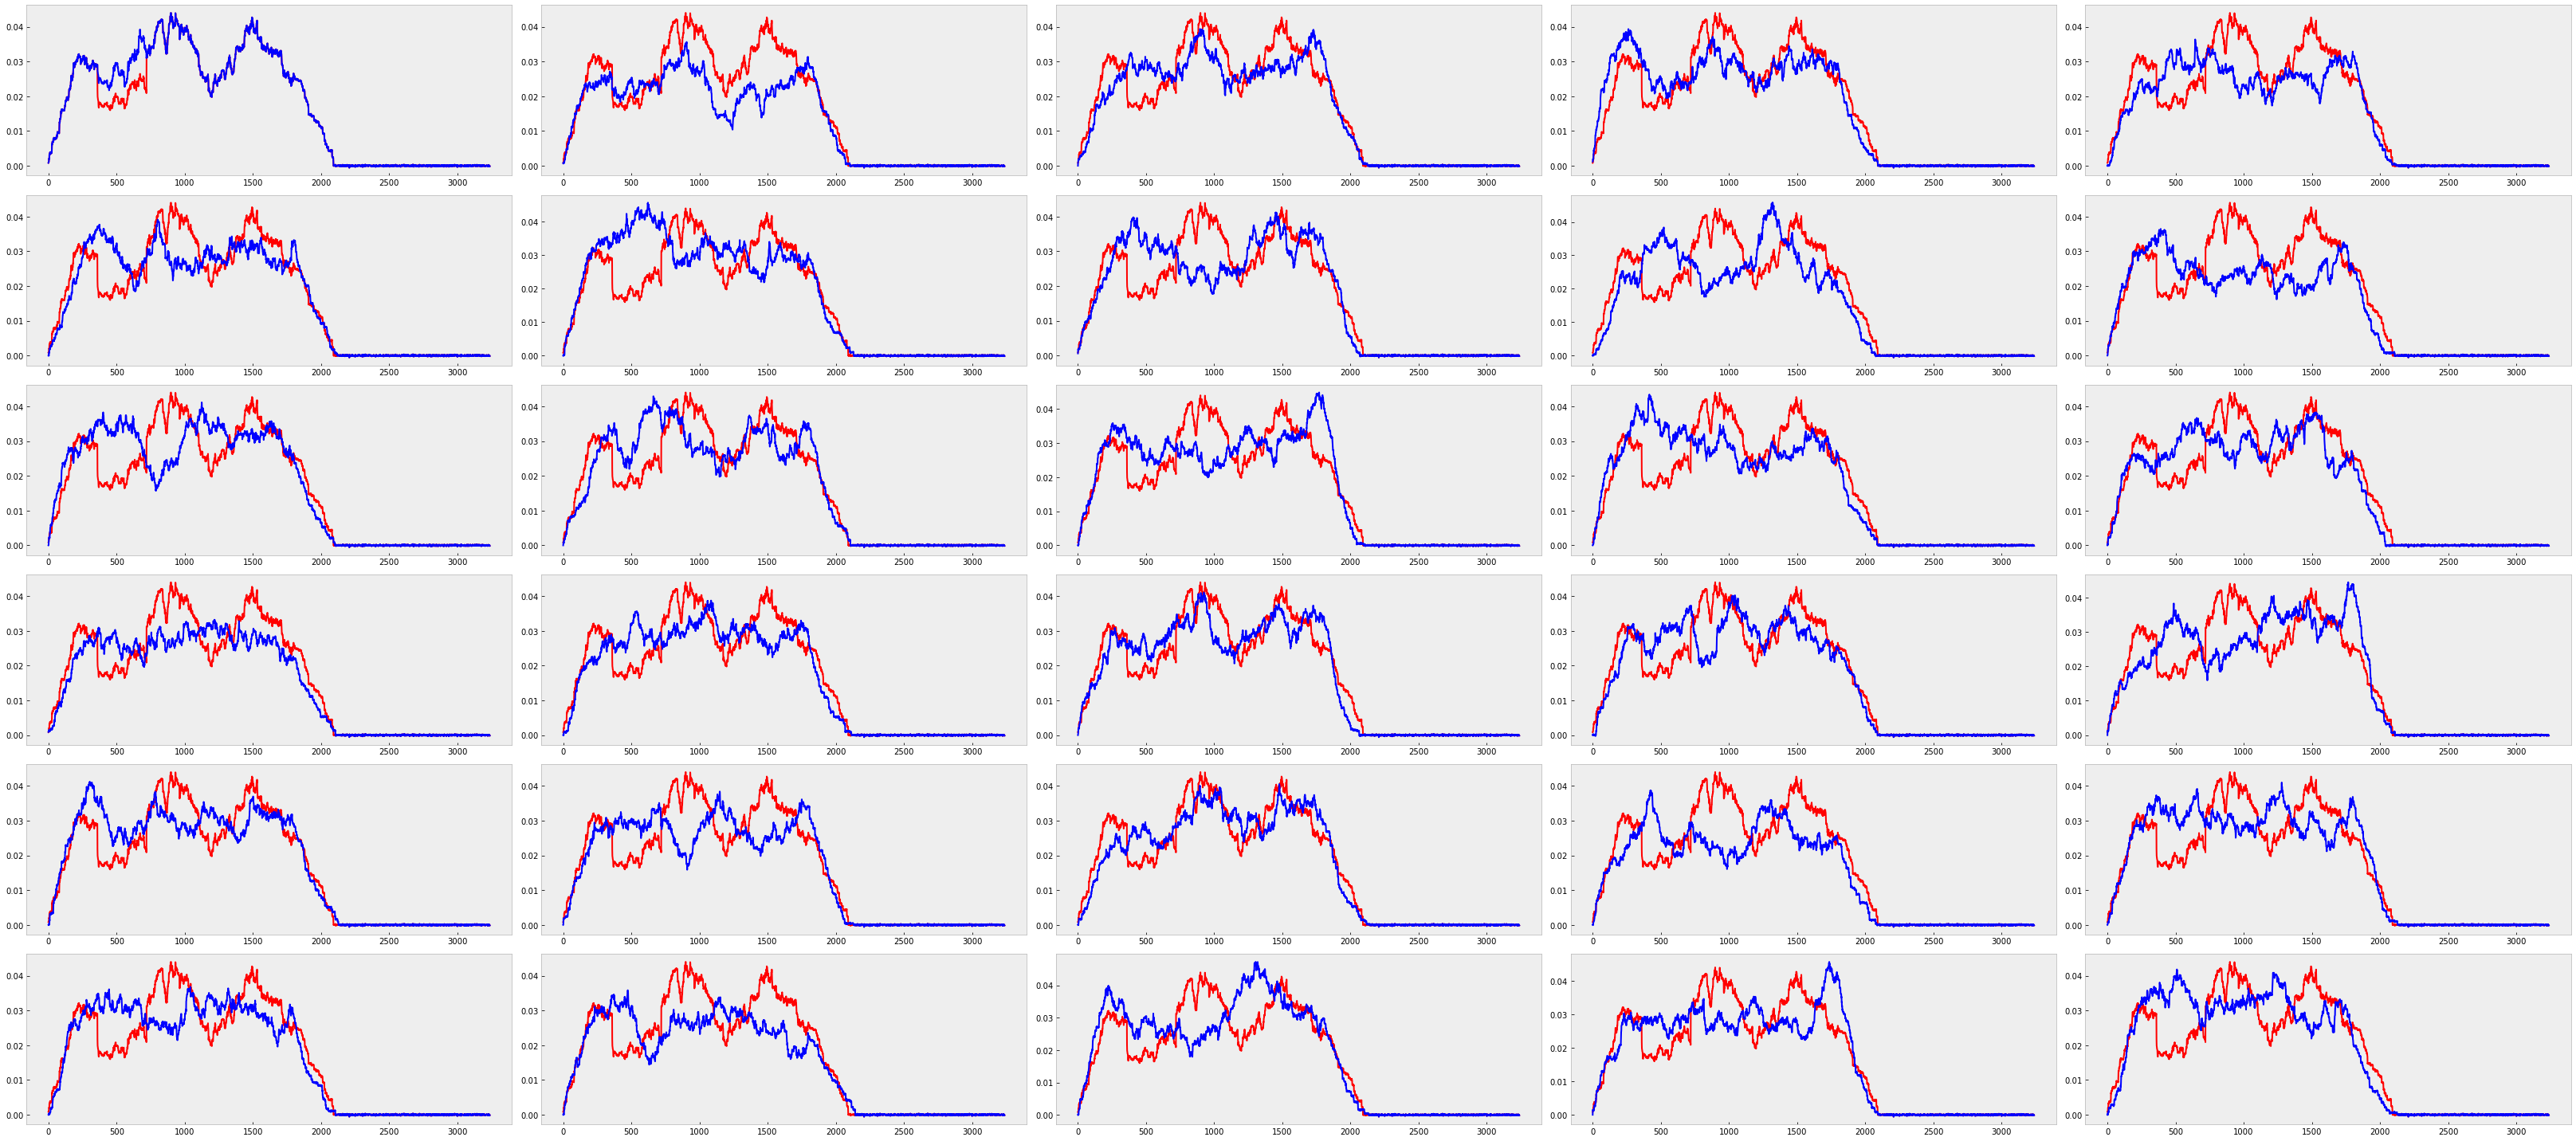

In [31]:
fig, ax = plt.subplots(nrows=6, ncols=5, figsize = (45,20))
num = 0
for i in range(0, 6):
  for j in range(0, 5):
    imgs_bin_noise_plot = np.load(flist_plot[num])
    ax[i, j].plot(imgs_bin_noise[17, 11, :], c = "red")
    ax[i, j].plot(imgs_bin_noise_plot[17, 11, :], c = "blue")
    num = num + 1
    if num == 30:
      break

fig.tight_layout()

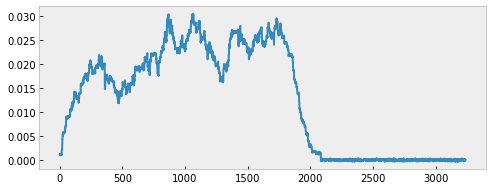

In [25]:
plt.figure(figsize=(8, 3))
plt.plot(imgs_bin_noise[18, 11, :])

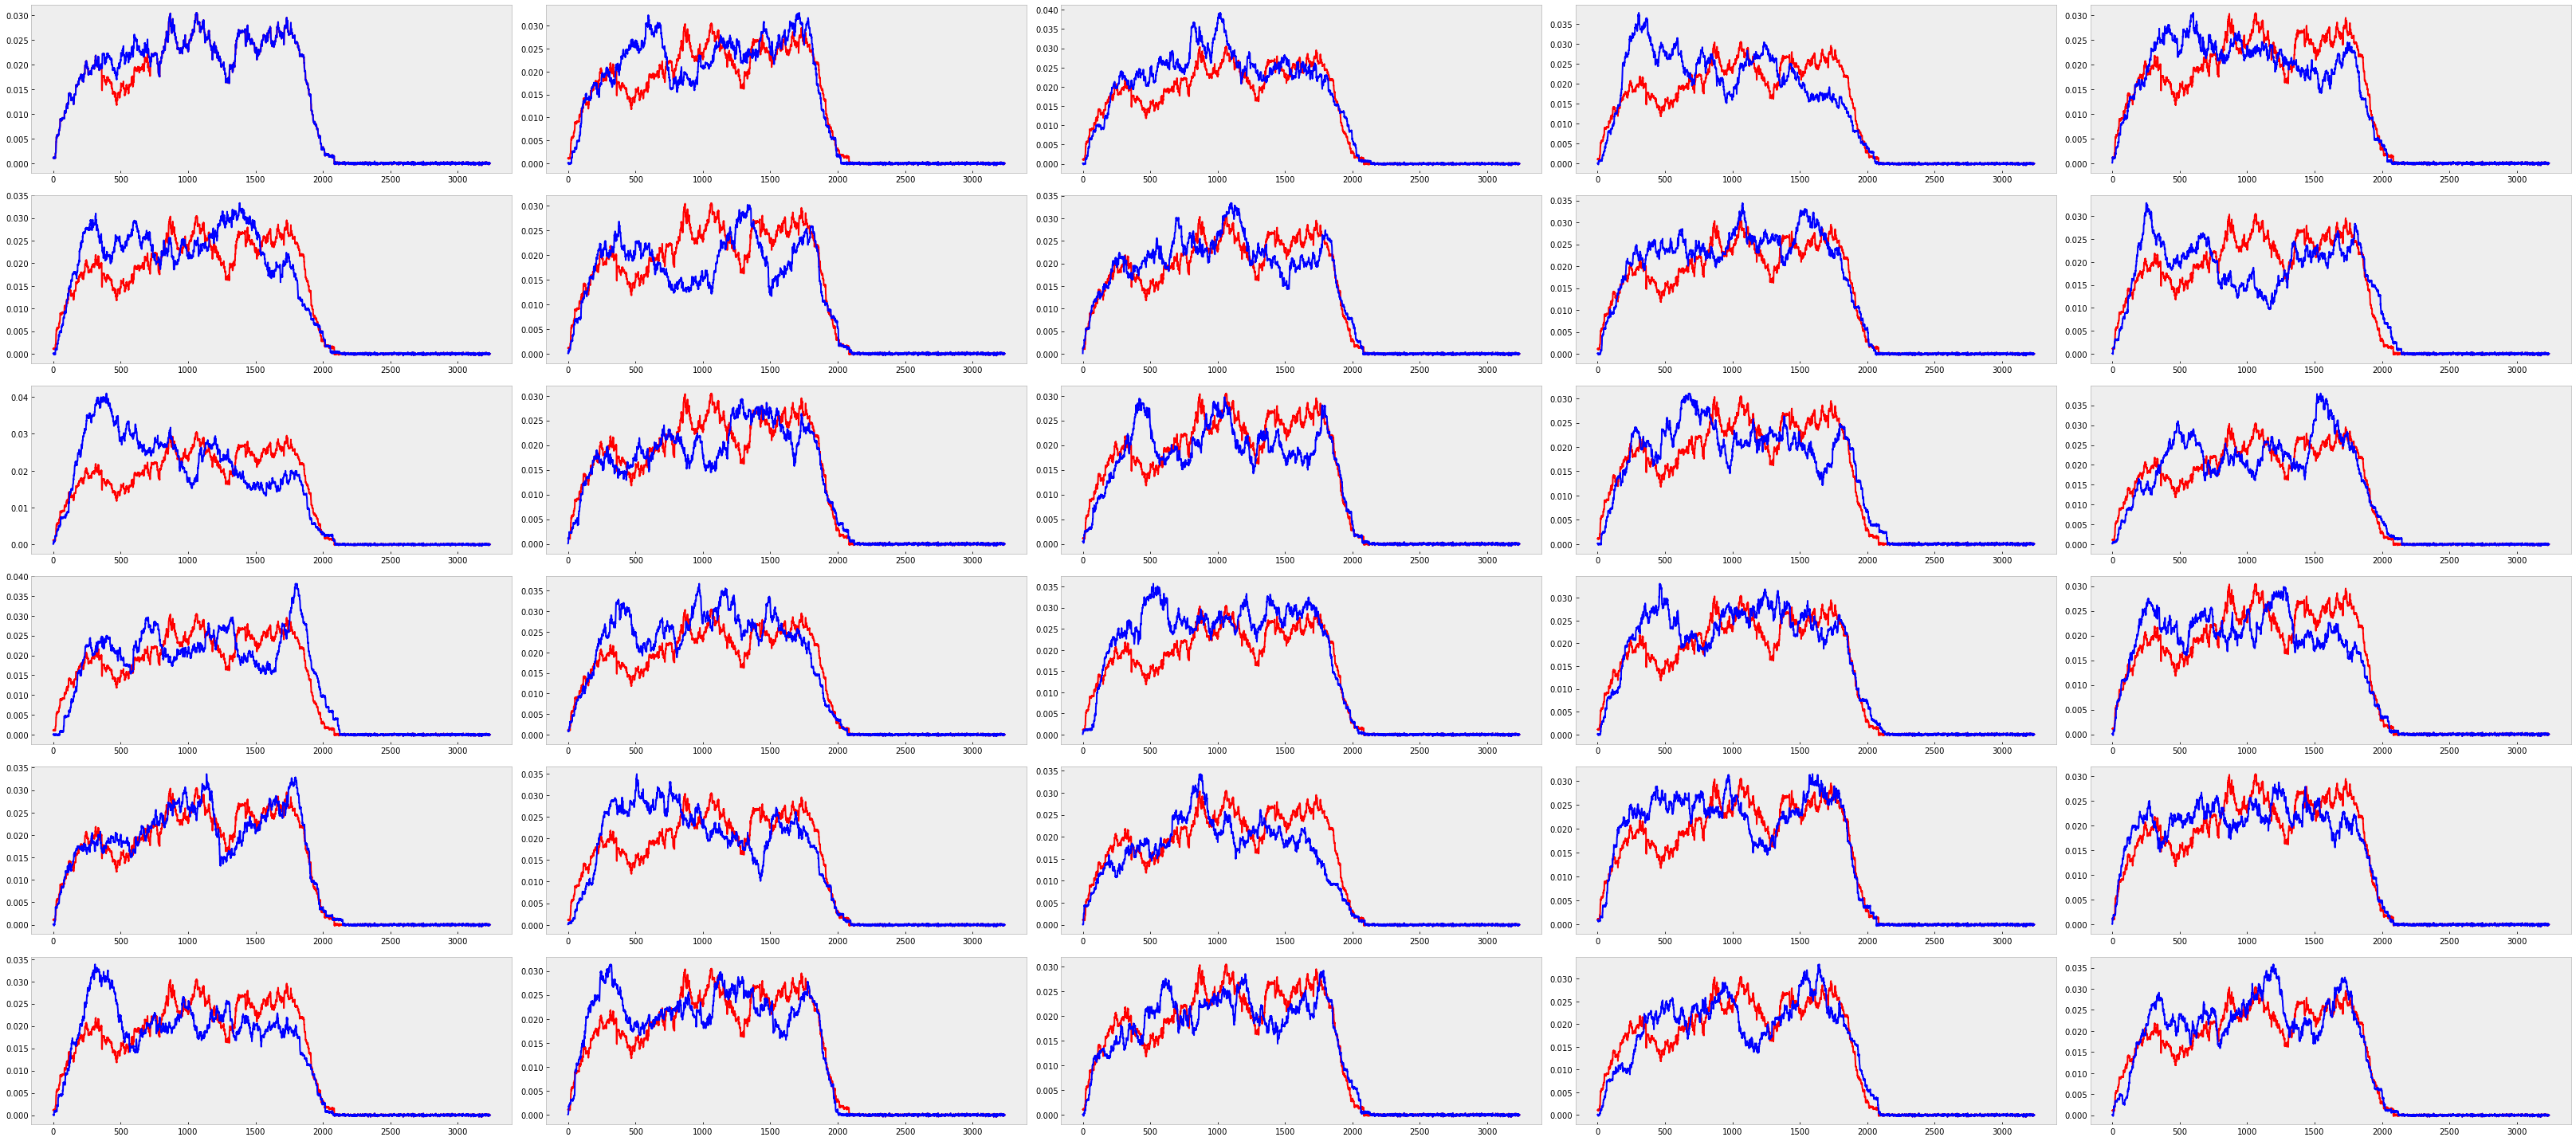

In [30]:
fig, ax = plt.subplots(nrows=6, ncols=5, figsize = (45,20))
num = 0
for i in range(0, 6):
  for j in range(0, 5):
    imgs_bin_noise_plot = np.load(flist_plot[num])
    ax[i, j].plot(imgs_bin_noise[18, 11, :], c = "red")
    ax[i, j].plot(imgs_bin_noise_plot[18, 11, :], c = "blue")
    num = num + 1
    if num == 30:
      break

fig.tight_layout()

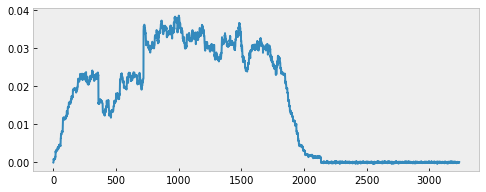

In [27]:
plt.figure(figsize=(8, 3))
plt.plot(imgs_bin_noise[19, 11, :])

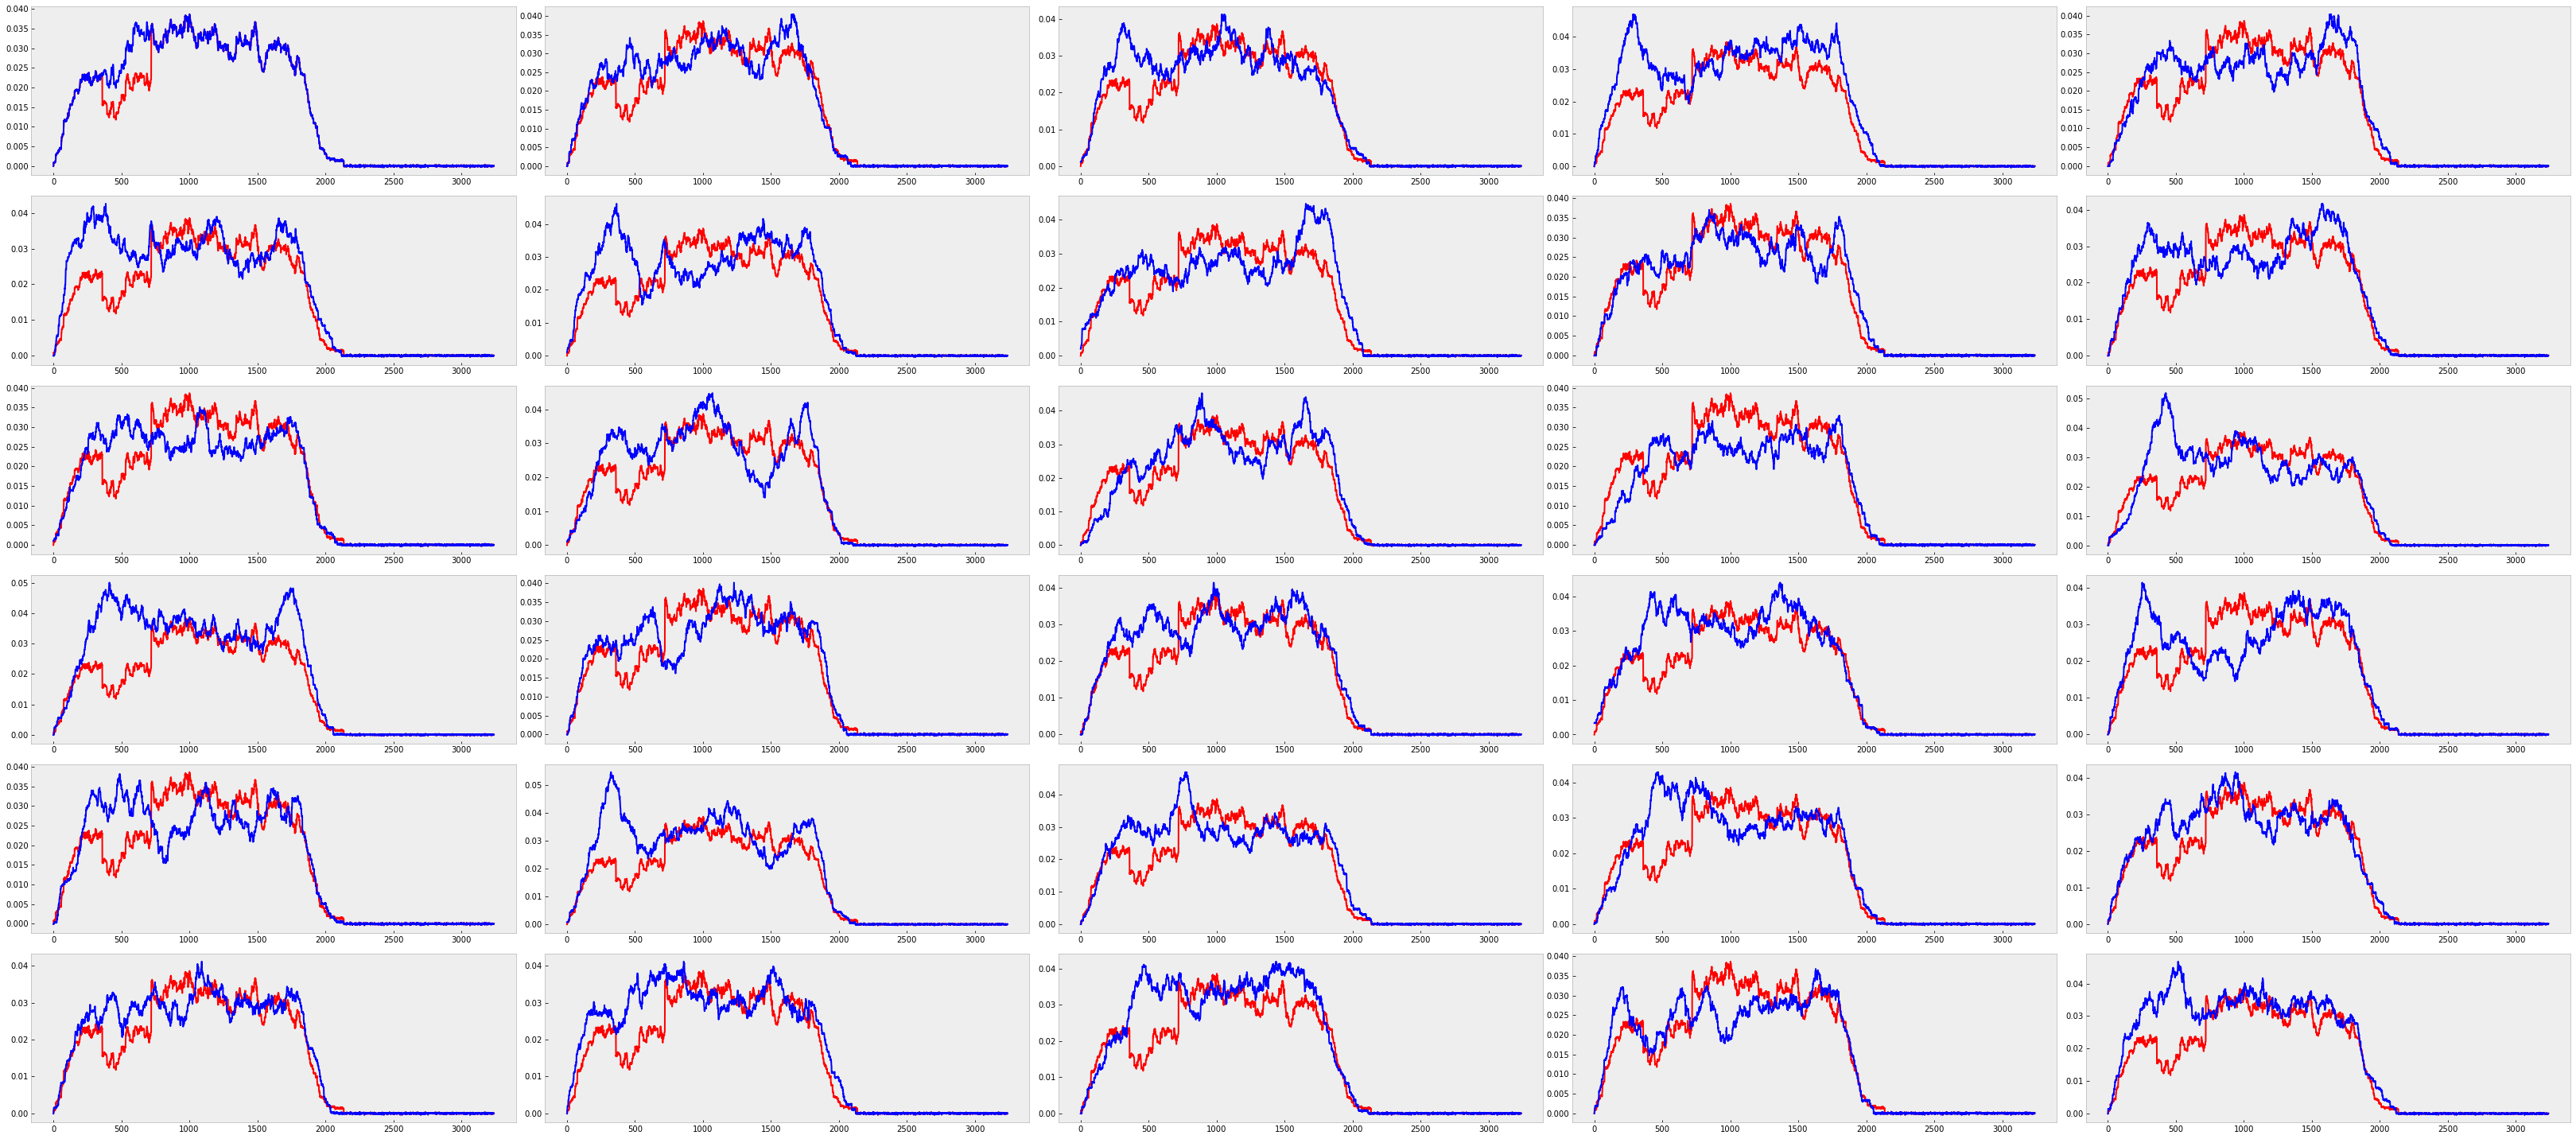

In [29]:
fig, ax = plt.subplots(nrows=6, ncols=5, figsize = (45,20))
num = 0
for i in range(0, 6):
  for j in range(0, 5):
    imgs_bin_noise_plot = np.load(flist_plot[num])
    ax[i, j].plot(imgs_bin_noise[19, 11, :], c = "red")
    ax[i, j].plot(imgs_bin_noise_plot[19, 11, :], c = "blue")
    num = num + 1
    if num == 30:
      break

fig.tight_layout()